# Create 4-col tsv readable text from 4-col tsv full content file
* The input should be a tsv table with url, end_url, binary, full-content
* The output will then be a file with url, end_url, length-readable-text, readable-text

In [90]:
%%bash
# Take a list of urls and generate the full content file list
# if you see this message: dyld: Library not loaded: /usr/local/opt/readline/lib/libreadline.6.dylib
# you need to upgrade bash via `brew upgrade bash`, then restart the kernel

## Run the output list from previous cell through the url-classifier in text saving mode.
#. ../set_flag/return_full_text_on               # This sets an env variable which tells urlChecker to save content to disk
export URL_FULL_CONTENT=True

cat temp/random_1000_plain_urls.txt | \
 python ../bin/urlChecker.py > \
 temp/random_1000_plain_urls.tsv
echo "DONE!"
### When the script finishes, you should have an html file in the `URL_SAVE_DEST` location named after the url, i.e. acme.com will have an acme.com file with the html content in it.

DONE!


----------
hawkaerial.com
bgreen.solar
texasserenityacademy.net
phonewerk.de
peachdish.com
offtime.co
bigfishpr.com
mayvenn.com
mcknight.org
rickjoneselectric.com
deers.com.pl
easytrainingchoice.com
akitechnologies.com
acfellowship.org
atmosphair.fr
frankly.me
vimax.br.com
marvin.at
nnrhospital.com
seaislandmedia.com
4mypromo.com
aquariumbyamblard.com
visionbd.com
mesautomation.com.mx
jfkhealthsystem.org
geneadviser.com
launchlabcapital.com
xenlogixsoftware.in
nolimitsav.net
jwvpork.com
egisinternational.com
pixelproject.net
cetac.se
matplotlib.org
austinrees.com
medinacreativehousing.com
attractivesmiles.com
startuplab.fr
raywhitereservoir.com.au
barleyz.com
fitwasted.com
ikorn.be
motobudrex.pl
ascendispharma.com
riflesdirect.com
ontimeinternational.com
dbnx.com
intercollege.nl
nuteca.com
evansshoes.com.au
vertices.com
digitalia.fr
zindel.de
incisanfire.com
binghisboutique.com
konti.ua
unifieddigital.com
spine.org
luckyaproperties.com
octopusink.ca
bahco.com
dap.com
sonicautomotive.co

In [83]:
# Remove foreign language
import pandas as pd
import classification.classify as cf
filterNAME = "hotel"
base_name = "category_content_{}".format(filterNAME)
source_file = 'temp/categories/{}.tsv'.format(base_name)
table = [] 

def probably_english(arr_data):
    threshold = 3
    if arr_data[2] == 'Neutral':
        for lang in range(45,68,2):
            if int(arr_data[lang]) < threshold:
                continue
            else:
                return False
        return True
    else:
        return False
            
    
with open(source_file, 'r') as source, open("temp/categories/{}_lang_filtered.tsv".format(base_name), 'w') as target:
    for line in source:
        line = line.decode('ascii', 'ignore').encode('ascii')
        try:
            arr_results = cf.process_line(line)
        except:
            print "ERROR on ", line[:50]
            continue
        if len(arr_results) != 0:
            if probably_english(arr_results):
                target.write(line)
                table.append(arr_results)

print len(table)
df = pd.DataFrame(table)
threshold = 2
df.loc[(df[2] == 'Neutral') & (df[45] <= threshold)]

ERROR on  ashotel.es	http://www.ashotel.es/	1	evaluate_conte
ERROR on  absolutehotel.com	http://www.absolutehotel.com/	1	
ERROR on  akkahotels.com	http://www.akkahotels.com/	1	evalua
ERROR on  atel-hotels.com	http://fr.atel-hotels.com/	1	evalu
ERROR on  ar-hotels.com	https://www.ar-hotels.com/	1	evaluat
53


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68


In [84]:
# UTIL function, open a standard 4 column tsv output and return a list of dictionaries
# arguments:
# source_file: string, path to 4 column tsv, (url, end_url, binary, full_text)
# returns: list<dict(url,end_url,binary,description)>
import classification.data_extraction_functions as de
import os
import pandas as pd
print os.getcwd()

base_name = "category_content_{}_lang_filtered".format(filterNAME)
source_file = 'temp/categories/{}.tsv'.format(base_name)
target_file = 'temp/categories/{}_visible.tsv'.format(base_name)

def open_filter_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        for line in source:
            url, end_url, binary, full_text = line.split('\t')
            visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
            len_visible = len(visible_text.split(' '))
            target.write('\t'.join(
            [
                url,
                end_url,
                str(len_visible),
                str(visible_text.encode('ascii', 'ignore').decode('ascii'))
            ]))
            target.write('\n')

import csv
import sys
csv.field_size_limit(sys.maxsize)
def open_csv_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        sourcereader = csv.reader(source)
        for row in sourcereader:
            try:
                url, end_url, binary, full_text = row[0], row[1], row[2], row[3]
                #print url
                visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
                len_visible = len(visible_text.split(' '))
                target.write('\t'.join(
                [
                    url,
                    end_url,
                    str(len_visible),
                    str(visible_text.encode('ascii', 'ignore').decode('ascii'))
                ]))
                target.write('\n')
            except:
                continue
            

csv_format = False
if csv_format:
    res_list = open_csv_file(source_file, target_file)
else:
    res_list = open_filter_file(source_file, target_file)
print "DONE saved to ", target_file
                

/Users/efrainolivares/repos/url_classifier_develop/notebooks
DONE saved to  temp/categories/category_content_hotel_lang_filtered_visible.tsv


# Take two visible text files and create map of xy word cross counts
* Open both files and gather all words in two separate lists.
* Create a dictionary of tuples containing counts for each word ex: "word":(x times in file 1, y times in file 2)

In [85]:
# source of interest should be source_2, which ends up on x axis <->
source_1 = "temp/categories/category_content_staffing_lang_filtered_visible.tsv"
source_2 = "temp/categories/category_content_{}_lang_filtered_visible.tsv".format(filterNAME)
import re
from collections import defaultdict


def clean_words(arr_words):
    # remove anything that has numbers
    words = [word for word in arr_words if not any(char.isdigit() for char in word) and re.search('[a-zA-Z]', word)]
    # remove anything with these characters
    bad_markers = ['=', '>', ')', '(', "'", "[", "]","."]
    final_words = []
    for word in words:
        keep = True
        for marker in bad_markers:
            if marker in word:
                keep = False
                continue
        if keep:
            final_words.append(word)
    return final_words
    
# Helper function to extract all text from a single file
def get_dict_word_pairs(source_file2, source_file1):
    word_dict = {}
    for idx, source_file in enumerate([source_file1, source_file2]):
        with open(source_file, 'r') as source:
            for line in source:
                full_text = line.split('\t')[3]
                words = clean_words(full_text.split(' '))
                for idx_word, word in enumerate(words):
                    try:
                        word_dict[word][idx] += 1
                    except:
                        word_dict[word] = [0,0]
                        word_dict[word][idx] += 1
                    if idx_word+1 < len(words):
                        try:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                        except:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])] = [0,0]
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                    if idx_word+2 < len(words):
                        try:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
                        except:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])] = [0,0]
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
    return word_dict


word_dict = get_dict_word_pairs(source_1, source_2)
print "DONE, FOUND THIS MANY WORDS COUNTS:", len(word_dict)

#clean_words(['=', 'a1', 'good'])            

DONE, FOUND THIS MANY WORDS COUNTS: 76627


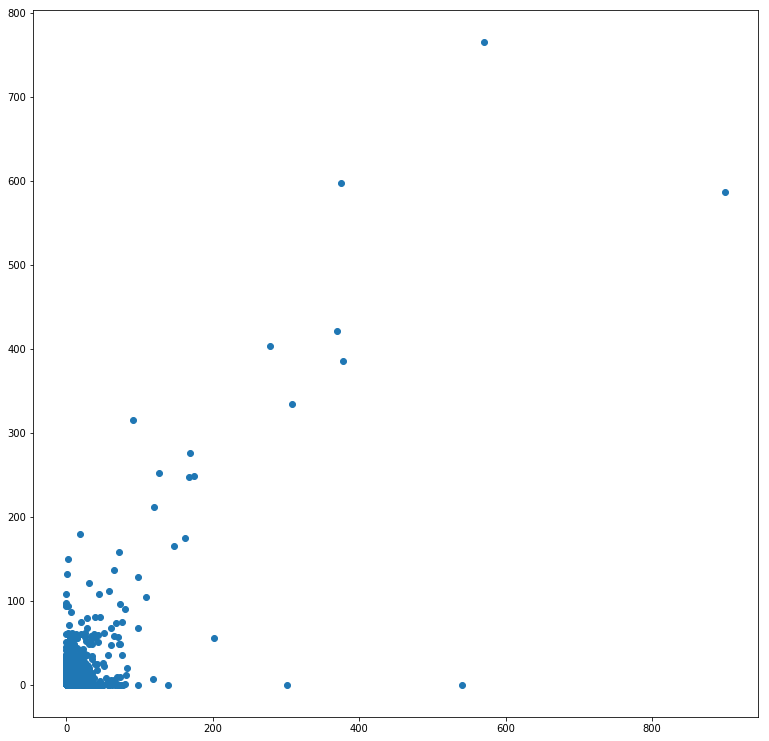

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

xarr = []
yarr = []
for word, xy_pair in word_dict.iteritems():
    xarr.append(xy_pair[0])
    yarr.append(xy_pair[1])
    

plt.figure(figsize = (13,13))
plt.scatter(xarr,yarr)
plt.show()

In [87]:
# sort through the dictionary and pull out the words closes to the axis of language we want


def get_top_hits(word_dict, topn=100, xmin=30, xmax=60000, ymin=0, ymax=2):
    final_list = []
    for word, xy in word_dict.iteritems():
        if xy[0] <= xmax and xy[0] >= xmin and xy[1] <= ymax and xy[1] >= ymin:
            final_list.append( (word, xy))
    final_list.sort(key=lambda x: x[1][0])
    final_list.reverse()
    return final_list[:topn]

def stringify_list(lhits):
    ret_strings = []
    for hit in lhits:
        #ret_strings.append("\"(\\W {}|{} \\W)\"".format(hit[0], hit[0]))
        ret_strings.append("\" {} \"".format(hit[0]))
    return ','.join(ret_strings)
    
        
final_list = get_top_hits(word_dict, 200)
print stringify_list(final_list)
if False:
    for item in final_list:
        print item

" hotel "," hotels "," book "," aston "," rooms "," resort "," book now "," azimut "," amora "," apex "," spa "," stay "," resorts "," inn "," guests "," rates "," weddings "," meetings "," room "," dining "," hotels resorts "," suites "," hotels in "," gallery "," hotel apex "," restaurant "," amora hotel "," adaaran "," special offers "," luxury "," glasgow "," heritance "," art "," bar "," diego "," beach "," san diego "," night "," accommodation "," arlo "," enjoy "," packages "," emaar "," apex city "," holiday "


In [88]:
# Final cell, choose a reference language, and get list of keywords against that for the others.
languages = [
    "bank",
    "education",
    "goverment",
    "hospital",
    "hotel",
    "petcare",
    "restaurant",

]
# source of interest should be source_2, which ends up on x axis <->
ref_language = "staffing"
path_ref_language = "temp/categories/category_content_{}_lang_filtered_visible.tsv".format(ref_language)

for language in languages:
    path_language = "temp/categories/category_content_{}_lang_filtered_visible.tsv".format(language)
    word_dict = get_dict_word_pairs(path_ref_language, path_language)
    final_list = get_top_hits(word_dict, 200)
    length_list = len(final_list)
    print "    [\n        \"--{} {}--\", {},\n    ],".format(language, length_list, stringify_list(final_list))


    [
        "--bank 45--", " bank "," credit "," loans "," savings "," deposit "," loan "," card "," accounts "," checking "," mortgage "," online banking "," money "," branch "," investment "," debit "," mobile banking "," atm "," rates "," cards "," credit card "," savings account "," business banking "," cash "," internet "," ne "," internet banking "," calculators "," hours: "," of deposit "," affinbank "," debit card "," certificates "," credit cards "," certificates of "," personal banking "," hours: monday-friday "," monday-friday "," certificates of deposit "," enroll "," interest "," of credit "," id "," mortgages "," visa "," al-arafah ",
    ],
    [
        "--education 79--", " students "," college "," school "," faculty "," alumni "," courses "," admissions "," institute "," admission "," college of "," course "," undergraduate "," academy "," ace "," school of "," library "," sciences "," calendar "," diploma "," australian "," acu "," arts "," aid "," scholarships ","

In [89]:
# ambientalbr.com.br
!. ../set_flag/return_full_text_on; echo elglobo.com.mx | python ../bin/urlChecker.py | python ../classifier/classify.py > temp_file.tsv
with open("temp_file.tsv",'r') as source:
    line_count = -2
    for line in source:
        cols = line.split('\t')
        for col in cols:
            print line_count, col
            line_count += 1

----------
elglobo.com.mx
-2 #% starting script

-1 processing input

0 elglobo.com.mx
1 http://www.elglobo.com.mx/
2 Foreign
3 25533
4 348
5 0
6 keywords marketing: []
7 0
8 keywords staffing: []
9 2
10 desc marketing: [u'a hr', u'post']
11 1
12 desc staffing: [u'seo']
13 1
14 --marketing-- [u'seo']
15 1
16 --staffing-- [u'post']
17 0
18  --medical--  []
19 0
20 --goverment-- []
21 0
22 --education-- []
23 0
24 --retail-- []
25 0
26 --food-- []
27 0
28 --emergency services-- []
29 0
30 --banking-- []
31 0
32 --manufacturing-- []
33 0
34 --telecommunications-- []
35 0
36 --hotels-restaurants-- []
37 0
38 --tourist-attractions-- []
39 0
40 --organizations-- []
41 0
42 --animal-rescue-shelter-- []
43 0
44 --military-- []
45 34
46 --spanish 200-- [u' la ', u' en ', u' el ', u' para ', u' que ', u' los ', u' con ', u' del ', u' ms ', u' por ', u' o ', u' tu ', u' lo ', u' nuestros ', u' nuestra ', u' nuestro ', u' todos ', u' aviso ', u' te ', u' ser ', u' todos los ', u' inicio ', u' dere